Name: Syeduzzaman Khan

Project Title: Weekly Sales Predication

1. Objectives:
Sales prediction and identifying potential shoppers are interesting topics in predictive modeling. There are several predictive model technique existing to predict sales. In our project, we will Linear Regression Model to predict the Amazon weekly sales.

The purpose of this project is to analyze the three different datasets (features, store, sales) and help Amazon to predict their weekly sales.

To achieve Amazon goal, we have to carefully analyze the dataset considering different perspectives. At the beginning of the project, we will get too familiar with datasets and look into different columns. Then, we will pick the relevant columns that will lead us to reach our goals. The obtained results will be visualized using plot and table.

# 2. Data Exploration: 

In [1]:
# read csv file 
features <- read.csv ("Features data set.csv", na.strings="",stringsAsFactors=FALSE)
head(features)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0963582,8.106,FALSE
1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2421698,8.106,TRUE
1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891429,8.106,FALSE
1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196429,8.106,FALSE
1,05/03/2010,46.50,2.625,NA,NA,NA,NA,NA,211.3501429,8.106,FALSE
1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806429,8.106,FALSE


In [2]:
# Percentiles of the Temperature

Temperature<-features$Temperature # sotre Temperature to Temperature variable 
Temperature[Temperature=="NA"] <- "0" # missing values set to zero 
Temperature<-as.numeric(Temperature)# convert to number
cat("\nPercentiles of Temperature : \n")
quantile(Temperature, prob = c(0.25, 0.50, 0.75)) # percentiles of Temperature


Percentiles of Temperature : 


25%     50%     75% 
45.9025 60.7100 73.8800

In [3]:
# read csv file 
sales_data <- read.csv ("sales data-set.csv", na.strings="",stringsAsFactors=FALSE)
head(sales_data )

Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,5/2/10,24924.50,FALSE
1,1,12/2/10,46039.49,TRUE
1,1,19/02/2010,41595.55,FALSE
1,1,26/02/2010,19403.54,FALSE
1,1,5/3/10,21827.90,FALSE
1,1,12/3/10,21043.39,FALSE


In [4]:
# Percentiles of the Weekly_Sales

Weekly_Sales<-sales_data$Weekly_Sales # sotre Weekly_Sales to Weekly_Sales variable 
Weekly_Sales[Weekly_Sales=="NA"] <- "0" # missing values set to zero 
Weekly_Sales<-as.numeric(Weekly_Sales)# convert to number
cat("\nPercentiles of Weekly_Sales : \n")
#quantile( (sales_data$Weekly_Sales, na.rm = TRUE), prob = c(0.25, 0.50, 0.75)) # percentiles of Weekly_Sales

cat("Average weekly sales: \n")
print(mean(Weekly_Sales,na.rm = TRUE))


Percentiles of Weekly_Sales : 
Average weekly sales: 
[1] 15985.88


In [5]:
# read csv file 
stores_data <- read.csv ("stores data-set.csv", na.strings="",stringsAsFactors=FALSE)
head(stores_data  )

Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505


In [6]:
# Percentiles of the stores_Size

Size<-stores_data$Size # sotre Weekly_Sales to Size variable 
Size[Size=="NA"] <- "0" # missing values set to zero 
Size<-as.numeric(Size)# convert to number
cat("\nPercentiles of Store Size : \n")
quantile(Size, prob = c(0.25, 0.50, 0.75)) # percentiles of Size

cat("Average Store Size: \n")
print(mean(Size))


Percentiles of Store Size : 


25%    50%    75% 
 70713 126512 202307

Average Store Size: 
[1] 130287.6


# 3 Merge:

In [7]:
m1<-merge(features,sales_data,by=c("Date","Store"),all=T)


In [8]:
head(m1,5)

Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.x,Dept,Weekly_Sales,IsHoliday.y
01/02/2013,1,56.46,3.244,9290.91,1359.9,265,20657.82,972.61,224.2352903,6.525,FALSE,NA,NA,NA
01/02/2013,2,54.75,3.244,13078.9,1642.02,545.2,12725.35,5002.74,223.8691966,6.237,FALSE,NA,NA,NA
01/02/2013,3,62.81,3.244,2513.52,665.85,30,3221.12,679.96,227.7801362,6.108,FALSE,NA,NA,NA
01/02/2013,4,49.07,3.232,27134.98,861.18,870.2,29210.08,1663.48,132.1537097,3.921,FALSE,NA,NA,NA
01/02/2013,5,58.99,3.244,4697.68,637.17,30,5803.02,970.8,224.8291434,5.494,FALSE,NA,NA,NA


In [9]:
sales_all<- merge(m1,stores_data,by.y="Store")


In [10]:
head(sales_all,5)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.x,Dept,Weekly_Sales,IsHoliday.y,Type,Size
1,22/06/2012,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.8030211,7.143,FALSE,41,408.46,FALSE,A,151315
1,22/06/2012,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.8030211,7.143,FALSE,98,11613.22,FALSE,A,151315
1,22/06/2012,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.8030211,7.143,FALSE,80,19063.50,FALSE,A,151315
1,22/06/2012,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.8030211,7.143,FALSE,44,3897.52,FALSE,A,151315
1,22/06/2012,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.8030211,7.143,FALSE,16,36362.45,FALSE,A,151315


# 4. Simple Linear Regression 

### Linear Regression Model: 1 - based on Fuel Price 

In [18]:
# model 1 : based on Fuel_Price 

mod1<-lm(Weekly_Sales~Fuel_Price,data=sales_all)
summary(mod1) # display summary 
new<-data.frame(Fuel_Price=3.10) # predication value 
res<-predict(mod1,newdata=new) # predication result 
print (res) # print the predicated value 


Call:
lm(formula = Weekly_Sales ~ Fuel_Price, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-17737 -13791  -8289   4169 677193 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16536.82     339.03  48.777   <2e-16 ***
Fuel_Price   -199.48      99.41  -2.007   0.0448 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22750 on 252359 degrees of freedom
  (171781 observations deleted due to missingness)
Multiple R-squared:  1.596e-05,	Adjusted R-squared:  1.199e-05 
F-statistic: 4.027 on 1 and 252359 DF,  p-value: 0.04478


       1 
15918.43 


### Linear Regression Model: 2 - based on Temperature 

In [24]:
 #model 2 : based on Temperature 

mod2<-lm(Weekly_Sales~Temperature,data=sales_all)
summary(mod2) # display summary 
new<-data.frame(Temperature=60) # predication value 
res<-predict(mod2,newdata=new) # predication result 
print (res) # print the predicated value


Call:
lm(formula = Weekly_Sales ~ Temperature, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-17919 -13811  -8288   4185 677172 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16581.750    159.534 103.939  < 2e-16 ***
Temperature   -11.825      2.515  -4.701 2.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22750 on 252359 degrees of freedom
  (171781 observations deleted due to missingness)
Multiple R-squared:  8.757e-05,	Adjusted R-squared:  8.361e-05 
F-statistic:  22.1 on 1 and 252359 DF,  p-value: 2.588e-06


       1 
15872.23 


### Linear Regression Model: 3 - based on Unemployment

In [25]:
# model 3 : based on Unemployment 
mod3<-lm(Weekly_Sales~Unemployment,data=sales_all)
summary(mod3) # display summary


Call:
lm(formula = Weekly_Sales ~ Unemployment, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-34888 -12794  -6319   4458 669497 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         8002.51    1373.89   5.825 5.73e-09 ***
Unemployment10.115 -1094.34    2213.23  -0.494 0.620988    
Unemployment10.148  6449.94    1550.53   4.160 3.19e-05 ***
Unemployment10.16     93.14    1679.46   0.055 0.955772    
Unemployment10.199  5416.09    1780.15   3.042 0.002347 ** 
Unemployment10.21   6374.48    1548.97   4.115 3.87e-05 ***
Unemployment10.256  -807.16    1721.57  -0.469 0.639177    
Unemployment10.398  4837.04    1571.98   3.077 0.002091 ** 
Unemployment10.409  -354.63    1678.93  -0.211 0.832712    
Unemployment10.524  2158.29    1674.27   1.289 0.197365    
Unemployment10.581  5325.23    1550.01   3.436 0.000591 ***
Unemployment10.641  4643.62    1551.42   2.993 0.002761 ** 
Unemployment10.926  5237.37    1473.85   3.554 0.00038

### Linear Regression Model: 4 - based on Size 

In [56]:
mod4<-lm(Weekly_Sales~Size,data=sales_all)
summary(mod4) # display summary 
new4<-data.frame(Size=1000) # predication value 
res4<-predict(mod4,newdata=new4) # predication result 
print (res4) # print the predicated value


Call:
lm(formula = Weekly_Sales ~ Size, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-21650 -12019  -4725  11752  72192 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.401e+04  1.698e+02   141.4   <2e-16 ***
Size        2.620e-17  1.173e-03     0.0        1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15700 on 44998 degrees of freedom
Multiple R-squared:  1.75e-30,	Adjusted R-squared:  -2.222e-05 
F-statistic: 7.874e-26 on 1 and 44998 DF,  p-value: 1


       1 
24006.23 


### Linear Regression Model: 5 - based on CPI 

In [57]:
mod5<-lm(Weekly_Sales~CPI,data=sales_all)
summary(mod5) # display summary 


Call:
lm(formula = Weekly_Sales ~ CPI, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-32759 -10182  -2079  12804  51452 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.382e+04  8.230e+02  28.941  < 2e-16 ***
CPI126.1454667 -2.887e+03  1.164e+03  -2.481 0.013107 *  
CPI126.1498065 -1.556e+03  1.164e+03  -1.337 0.181381    
CPI126.2085484 -2.842e+03  1.164e+03  -2.442 0.014599 *  
CPI126.3266774 -1.491e+03  1.164e+03  -1.281 0.200025    
CPI126.5621    -3.459e+03  1.164e+03  -2.972 0.002961 ** 
CPI126.8794839  2.093e+04  1.164e+03  17.982  < 2e-16 ***
CPI127.3009355 -4.466e+03  1.164e+03  -3.837 0.000125 ***
CPI127.99525    5.315e+03  1.164e+03   4.567 4.97e-06 ***
CPI128.5121935 -1.404e+03  1.164e+03  -1.206 0.227719    
CPI128.9107333 -7.632e+02  1.164e+03  -0.656 0.511994    
CPI129.0432    -1.902e+03  1.164e+03  -1.635 0.102137    
CPI129.089     -3.131e+03  1.164e+03  -2.690 0.007152 ** 
CPI129.1338387 -3.699e+03  1.16

# 5. Model Comparison:

The simple linear regression model 1 (independent variable fuel price) has adjusted R-square value 1.199e-05 and predicative model is weekly_sales=11060.34+668.29*Fuel_price.

The simple linear regression model 2 (independent variable: Temperature) has adjusted R-square value 8.361e-05   and predicative model is weekly_sales=11187.880+36.503* Temperature.

The simple linear regression model 3 (independent variable: Unemployment) has adjusted R-square value 0.05159 .

The simple linear regression model 4 (independent variable: Size) has adjusted R-square value -2.222e-05  and predicative model is weekly_sales=1.34e04+9.12e-18* Size.

The simple linear regression model 5 (independent variable: Size) has adjusted R-square value 0.1349 and predicative model is weekly_sales=2.382e+04-2.9603e03* CPI.

By comparing the above 5 models, we can say that model 3 is more accurate and make sense. The unemployment rate has inversly connection to weekly sales.  




# 6. Multiple Linear Regression:

#### Model 1: Temperature + Fuel price 


In [58]:
# model 1 : based on Fuel_Price +temperature 

mod1_mlm<-lm(Weekly_Sales~Fuel_Price+Temperature,data=sales_all)
summary(mod1_mlm) # display summary 


Call:
lm(formula = Weekly_Sales ~ Fuel_Price + Temperature, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-28145 -13163  -3706  11752  68920 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39388.463    650.102  60.588  < 2e-16 ***
Fuel_Price  -1242.880    179.685  -6.917 4.67e-12 ***
Temperature  -163.570      5.013 -32.626  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15500 on 44997 degrees of freedom
Multiple R-squared:  0.02555,	Adjusted R-squared:  0.02551 
F-statistic: 589.9 on 2 and 44997 DF,  p-value: < 2.2e-16


By combining, Fuel price and Temperature have shown better Adjusted R-squared value than simple linear regression model. The model can be expressed as weekly_sales=61459.74-5824.96* Fuel_Price-Temperature*345.73 

#### Model 2:  Fuel price+Unemployment 

In [59]:
# model 2 : based on Fuel_Price +Unemployment 

mod2_mlm<-lm(Weekly_Sales~Fuel_Price+Unemployment,data=sales_all)
summary(mod2_mlm)


Call:
lm(formula = Weekly_Sales ~ Fuel_Price + Unemployment, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-28263 -11483  -3478  12320  62413 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       10748.42    1803.11   5.961 2.52e-09 ***
Fuel_Price         3342.90     496.12   6.738 1.62e-11 ***
Unemployment4.308   789.88     787.61   1.003 0.315923    
Unemployment4.607  2661.31     702.01   3.791 0.000150 ***
Unemployment5.143  8764.49     796.89  10.998  < 2e-16 ***
Unemployment5.603   -69.09     702.08  -0.098 0.921613    
Unemployment5.644 -2250.89     785.31  -2.866 0.004156 ** 
Unemployment5.801   154.78     714.33   0.217 0.828456    
Unemployment5.943  2614.51     702.02   3.724 0.000196 ***
Unemployment5.946 -1358.81     712.37  -1.907 0.056468 .  
Unemployment6.3    8762.82     796.85  10.997  < 2e-16 ***
Unemployment6.334   -69.09     702.08  -0.098 0.921613    
Unemployment6.465   454.63     851.00   0.534 0.593187

By combining, Fuel price and Unemployment have shown better Adjusted R-squared value than multiple  linear regression model1.  



#### Model 3:  Fuel price+Store size 

In [60]:
# model 3 : based on Fuel_Price + store size  

mod3_mlm<-lm(Weekly_Sales~Fuel_Price+Size,data=sales_all)
summary(mod3_mlm)


Call:
lm(formula = Weekly_Sales ~ Fuel_Price + Size, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-22185 -12681  -4868  11947  71468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.026e+04  6.130e+02   49.36   <2e-16 ***
Fuel_Price  -1.917e+03  1.806e+02  -10.61   <2e-16 ***
Size         2.688e-17  1.172e-03    0.00        1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15680 on 44997 degrees of freedom
Multiple R-squared:  0.002497,	Adjusted R-squared:  0.002452 
F-statistic: 56.31 on 2 and 44997 DF,  p-value: < 2.2e-16


The Adjusted R-squared:  0.02429 of model 3 have shown lower performance than model 1 7 model 2.

#### Model 4:  Temperature+Uemployment 

In [61]:
# model 4 : based on Temperature+Unemployment

mod5_mlm<-lm(Weekly_Sales~Temperature+Unemployment,data=sales_all)
summary(mod5_mlm)


Call:
lm(formula = Weekly_Sales ~ Temperature + Unemployment, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-26895 -12113  -3429  12653  61045 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       38215.717    900.880  42.420  < 2e-16 ***
Temperature        -209.130      9.978 -20.960  < 2e-16 ***
Unemployment4.308  1091.656    781.481   1.397 0.162448    
Unemployment4.607 -4195.610    771.295  -5.440 5.36e-08 ***
Unemployment5.143  2524.320    821.503   3.073 0.002122 ** 
Unemployment5.603  1288.238    701.649   1.836 0.066362 .  
Unemployment5.644 -1543.997    781.857  -1.975 0.048299 *  
Unemployment5.801   410.592    707.717   0.580 0.561807    
Unemployment5.943 -1947.467    732.420  -2.659 0.007841 ** 
Unemployment5.946 -1238.144    699.738  -1.769 0.076827 .  
Unemployment6.3    5304.697    790.722   6.709 1.99e-11 ***
Unemployment6.334  1500.853    702.610   2.136 0.032676 *  
Unemployment6.465 -2900.427    783.338  

The Adjusted R-squared:  0.4657  of model 4 have shown better performance than model all multiple linear regression model.

Simple Linear Regression and Multiple Linear Regression Model Comparison: We have made 5 simple linear regression model but those model's adjusted R value is close to zero. Those model shows poor performance. By adding multiple variable, the adjusted R value becomes better. 

# Plot 

In [11]:
install.packages("ggplot2")
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


       1 
16321.59 


Warning message:
“Removed 171781 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 171781 rows containing missing values (geom_point).”Warning message:
“Removed 171781 rows containing missing values (geom_point).”

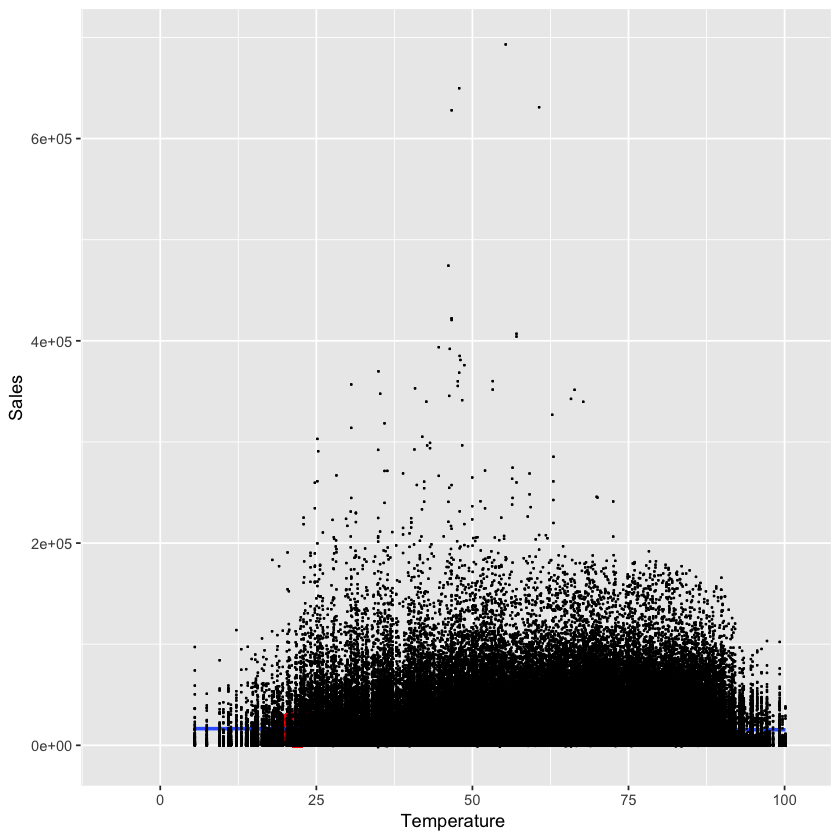

In [23]:
new<-data.frame(Temperature=22) # predication value 
res<-predict(mod2,newdata=new) # predication result 
print (res) # print the predicated value 

# plot usign ggplot 
ggplot(sales_all,aes(x=Temperature,y=Weekly_Sales))+geom_point(shape=0.01,size=.01)+geom_point(x=new$Temperature,y=res,size=10,shape=19,color="red")+geom_smooth(method=lm)+geom_point(shape=0.01,size=.010)+labs(x="Temperature ",y="Sales")



# 7.Summary

The analysis of dataset represents a good insight of Amazon weekly sales. The datasets are reliable. Therefore, the chance to get almost optimal solution for small projects is moderate. 

Simple Linear Regression models do not show better adjusted R value. That means the model performance will be poor. 
The weekly sales has no relation with store size (model 4). But unemployment rate and CPI are related to weekly sales. 

On the other hand, multiple linear regression models have shown better adjusted R values with compare to linear regression model. The Model 4(  Temperature+Unemployment) has high adjusted values than other models. Therefore, model 4 is the best suit model. 



# 8. Recommendations

These are the following recommendation:
1. Low unemployment rate means higher sales
2. High temperature means low weekly sales

